In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [50]:
data = pd.read_csv("lyrics.csv")
print("Number of songs: {:d}".format(data.shape[0]))

Number of songs: 362237


## Exploratory Data Analysis

In [51]:
data.head(1)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."


#### Missing Values

In [52]:
data.isnull().sum()

index         0
song          2
year          0
artist        0
genre         0
lyrics    95680
dtype: int64

There are 95680 songs that have missing lyrics. Let's drop all rows with missing values.

In [74]:
data = data.dropna()

### Which genre is the most popular?

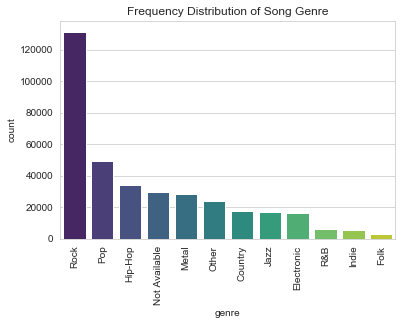

In [53]:
genres = data['genre'].value_counts().reset_index()
genres.columns = ['genre', 'count']

sns.set_style("whitegrid")
sns.barplot(x='genre', y='count', data=genres, palette='viridis')
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Song Genre')
plt.show()

In [54]:
print("The most popular genre is {:s}, followed by {:s}.".format(genres['genre'][0], genres['genre'][1]))
print("The least popular genre is {:s}.".format(genres["genre"].iloc[-1]))

The most popular genre is Rock, followed by Pop.
The least popular genre is Folk.


### Which artist has the most songs?

Mean number of songs per artist: 19.87.
Median number of songs per artist: 8.00.


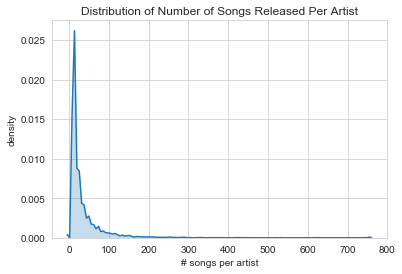

In [55]:
artists = data['artist'].value_counts().reset_index()
artists.columns = ['artist', 'count']

print("Mean number of songs per artist: {:.2f}.".format(artists['count'].mean()))
print("Median number of songs per artist: {:.2f}.".format(artists['count'].median()))


sns.kdeplot(artists['count'], shade=True, legend=False)
plt.xlabel('# songs per artist')
plt.ylabel('density')
plt.title('Distribution of Number of Songs Released Per Artist')
plt.show()

In [56]:
print("The artist with the most songs in this dataset is {:s}.".format(artists['artist'][0]))

The artist with the most songs in this dataset is dolly-parton.


### When are songs most frequently released?

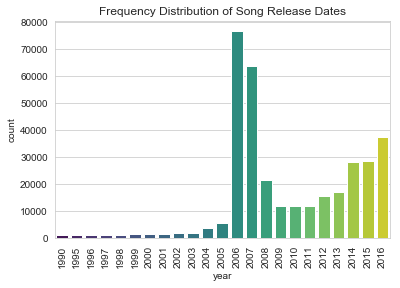

In [57]:
years = data['year'].value_counts().reset_index()
years.columns = ['year', 'count']

# filter out years that have count less than 1000
years = years[years['count'] > 1000]
sns.barplot(x='year', y='count', data=years, palette='viridis')
plt.xticks(rotation=90)
plt.title("Frequency Distribution of Song Release Dates")
plt.show()

This dataset has the most songs released in 2006.

### Lyric Analysis

In [82]:
pd.options.mode.chained_assignment = None

hiphop = data[data['genre'] == 'Hip-Hop']

In [ ]:
def clean_lyrics(x):
    custom_stopwords = ["'s", "n't", "'m", "'re", "'ll","'ve","...", "ä±", "''", '``','--', "'d", 'el', 'la']
    stopwords = nltk.corpus.stopwords.words('english') + custom_stopwords
    tokens = nltk.word_tokenize(x.lower())
    tokenized = [t for t in tokens if len(t) > 1 and not t.isnumeric() and t not in stopwords]
    return tokenized

hiphop['tokenized_lyrics'] = hiphop['lyrics'].apply(clean_lyrics)

In [85]:
hiphop['word_count'] = hiphop.apply(lambda x: len(hiphop['tokenized_lyrics']), axis=1)

In [84]:
hiphop.head()

,index,song,year,artist,genre,lyrics,tokenized_lyrics,word_count
249,249,i-got-that,2007,eazy-e,Hip-Hop,(horns)...\n(chorus)\nTimbo- When you hit me o...,"[(horns)...\n(chorus)\nTimbo-, When, you, hit,...",24850
250,250,8-ball-remix,2007,eazy-e,Hip-Hop,"Verse 1:\nI don't drink brass monkey, like to ...","[Verse, 1:\nI, don't, drink, brass, monkey,, l...",24850
251,251,extra-special-thankz,2007,eazy-e,Hip-Hop,"19 muthaphukkin 93,\nand I'm back in this bitc...","[19, muthaphukkin, 93,\nand, I'm, back, in, th...",24850
252,252,boyz-in-da-hood,2007,eazy-e,Hip-Hop,"Hey yo man, remember that shit Eazy did a whil...","[Hey, yo, man,, remember, that, shit, Eazy, di...",24850
253,253,automoblie,2007,eazy-e,Hip-Hop,"Yo, Dre, man, I take this bitch out to the mov...","[Yo,, Dre,, man,, I, take, this, bitch, out, t...",24850
